# Import Library & reading dataset

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [31]:
# Visualization Plot Settings
sns.set(rc={'figure.figsize': (15, 5)})
sns.set_style('whitegrid')
sns.set_palette('viridis')
plt.style.use('seaborn-v0_8-whitegrid')

In [32]:
# Loading the dataset
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Feature Engineering

In [33]:
# Feature Engineering weight_status
df['weight_status'] = np.where(df['bmi'] < 18.000, 'underweigth',
                      np.where(df['bmi'] < 25.000, 'normal',
                      np.where(df['bmi'] < 30.000, 'overweight', 'obese')))

df

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   weight_status  1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [35]:
# Separating Categorical & Numerical Values
cats = ['sex', 'smoker', 'region', 'weight_status']
nums = ['age', 'bmi', 'children', 'charges']

# Numeric Approach - Describing the data

In [36]:
# Sampling
df.sample(10)

,age,sex,bmi,children,smoker,region,charges,weight_status
801,64,female,35.970,0,no,southeast,14313.84630,obese
614,20,female,33.000,0,no,southeast,1880.07000,obese
78,22,female,39.805,0,no,northeast,2755.02095,obese
675,45,male,21.375,0,no,northwest,7222.78625,normal
313,49,male,35.860,0,no,southeast,8124.40840,obese
446,60,male,29.640,0,no,northeast,12730.99960,overweight
92,59,male,29.830,3,yes,northeast,30184.93670,overweight
963,46,male,24.795,3,no,northeast,9500.57305,normal
1229,58,male,30.305,0,no,northeast,11938.25595,obese
800,42,female,26.180,1,no,southeast,7046.72220,overweight


In [37]:
# Describe Categorial Values
df[cats].describe()

,sex,smoker,region,weight_status
count,1338,1338,1338,1338
unique,2,2,4,4
top,male,no,southeast,obese
freq,676,1064,364,707


In [38]:
# Describe Numerical values
df[nums].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [39]:
# # Check Smoker Feature
df.groupby(['smoker'])['charges'].count()

smoker
no     1064
yes     274
Name: charges, dtype: int64

In [40]:
# Check Sex Feature
df.groupby(['sex'])['charges'].count()

sex
female    662
male      676
Name: charges, dtype: int64

In [41]:
# Check Region Feature
df.groupby(['region'])['charges'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: charges, dtype: int64

In [42]:
# Check Children Feature
df.groupby(['children'])['charges'].count()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: charges, dtype: int64

In [43]:
# Check Weight_Status Feature
df.groupby(['weight_status'])['charges'].count()

weight_status
normal         230
obese          707
overweight     386
underweigth     15
Name: charges, dtype: int64

# Visual Approach

## Univariate Analysis

## Boxplot

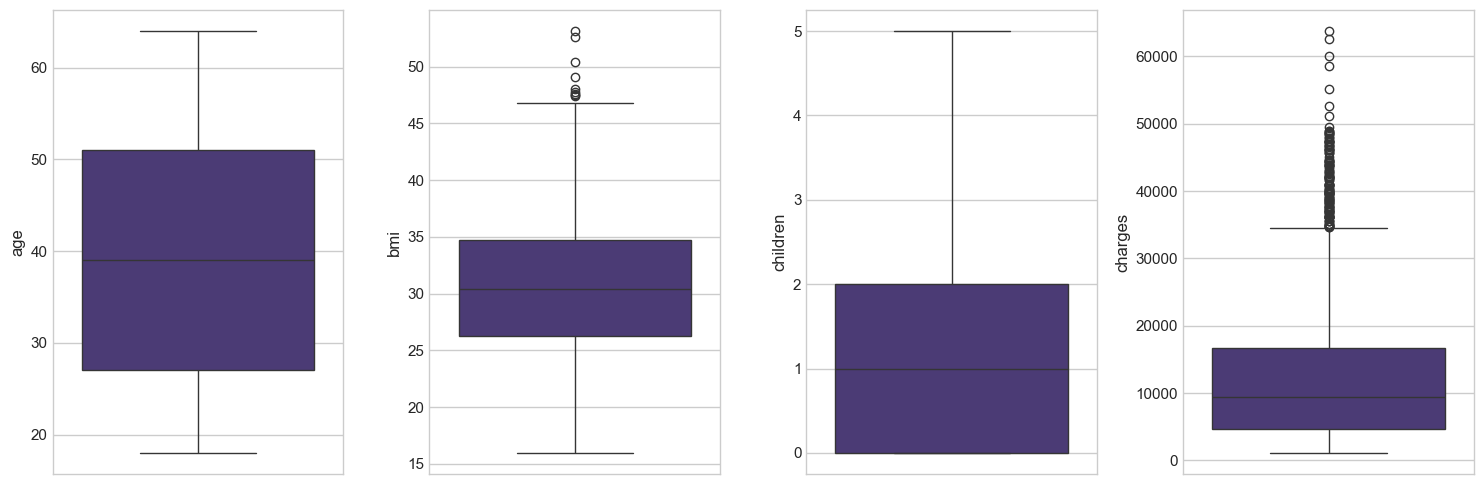

In [44]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y = df[nums[i]])
    plt.tight_layout()

# Kernel Density Estimate (KDE) plot

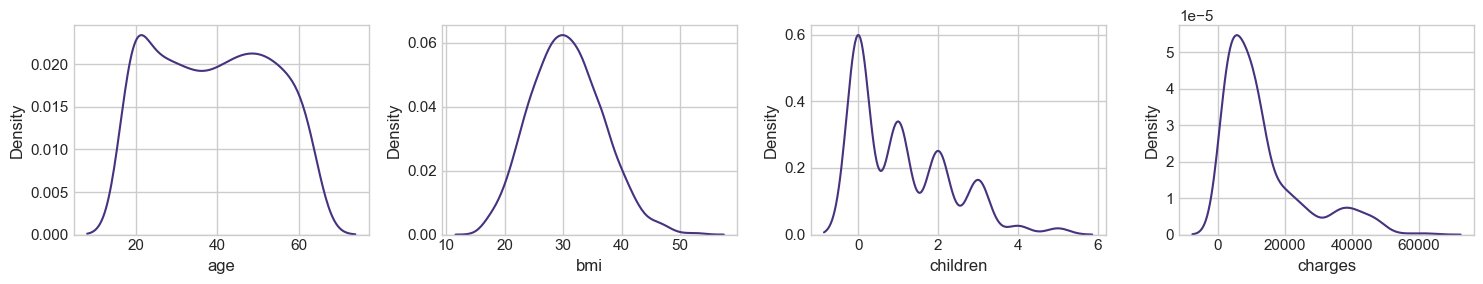

In [45]:
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.kdeplot(x = df[nums[i]])
    plt.tight_layout()

# Histplot

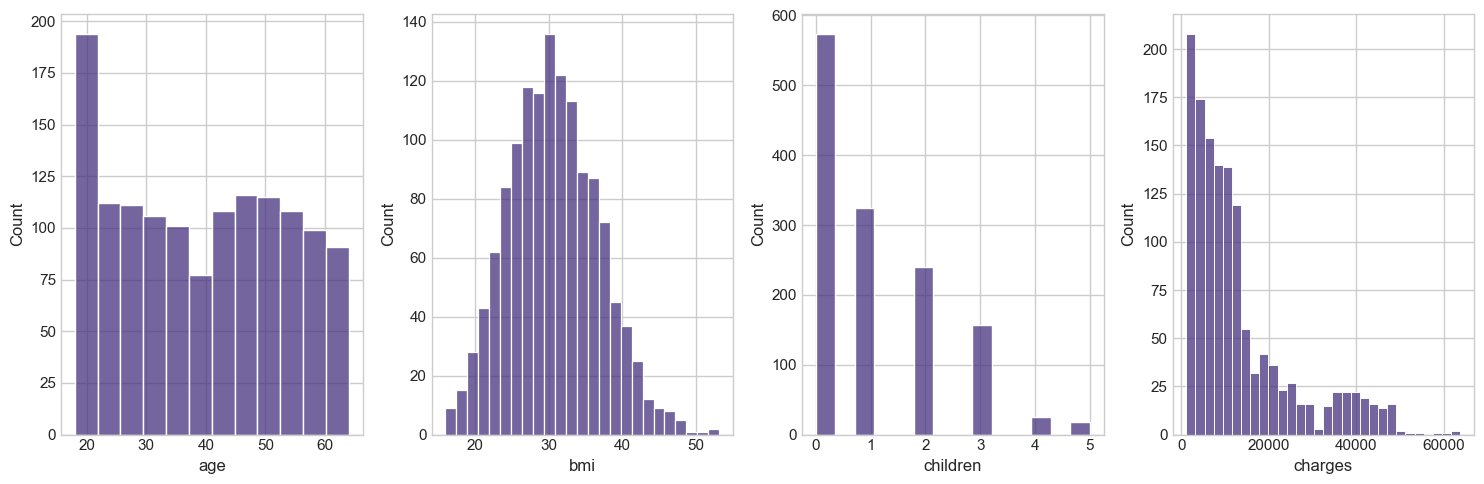

In [46]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.histplot(data = df[nums[i]])
    plt.tight_layout()

# Countplot

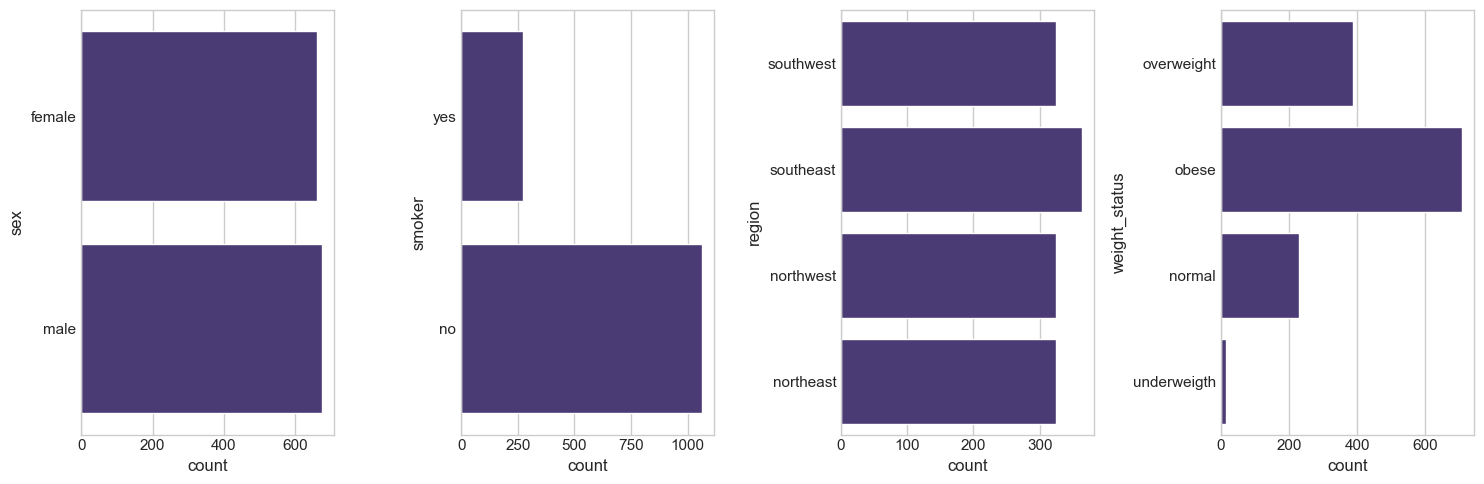

In [50]:
for i in range(0, len(cats)):
    plt.subplot(1, len(cats), i + 1)
    sns.countplot(df[cats[i]])
    plt.tight_layout()

# Multivariate Analysis

## Heatmap

<Axes: >

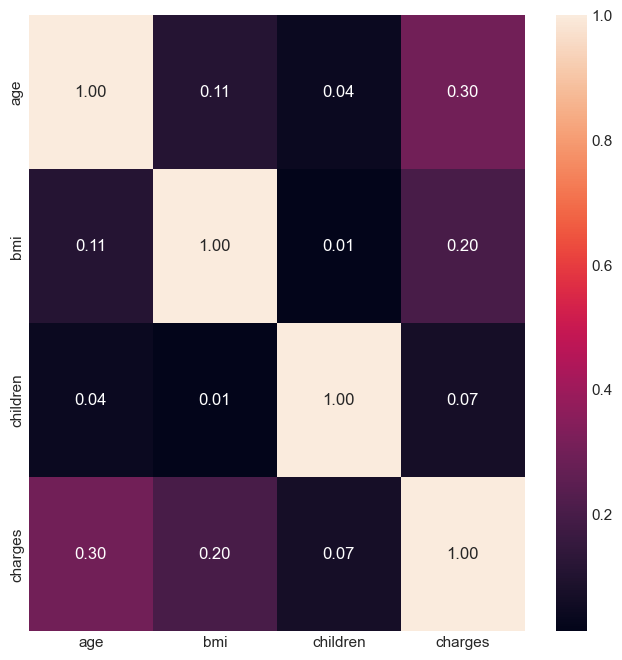

In [53]:
# Heatmap Correlation
plt.figure(figsize=(8,8))
sns.heatmap(df[nums].corr(), annot=True, fmt='.2f')

# Pairplot

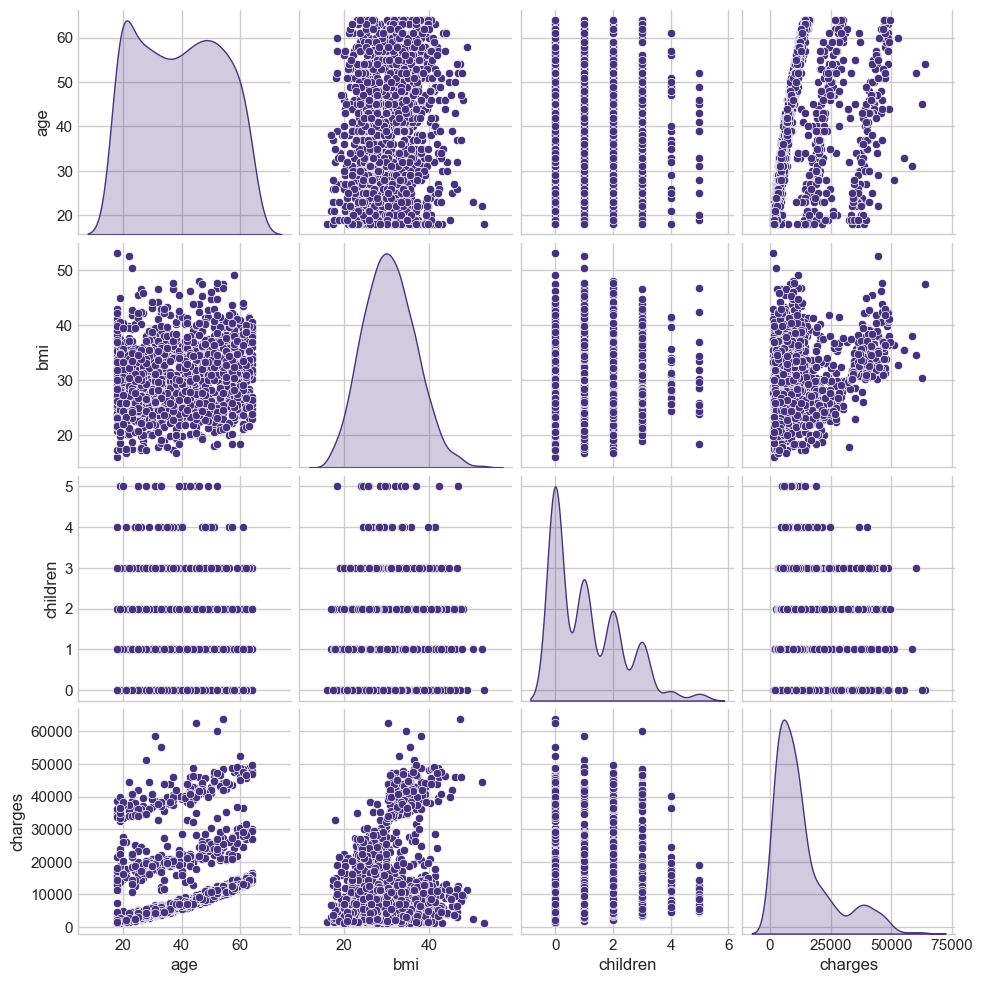

In [54]:
sns.pairplot(df[nums], diag_kind='kde')

# Scatterplot

<Axes: xlabel='bmi', ylabel='charges'>

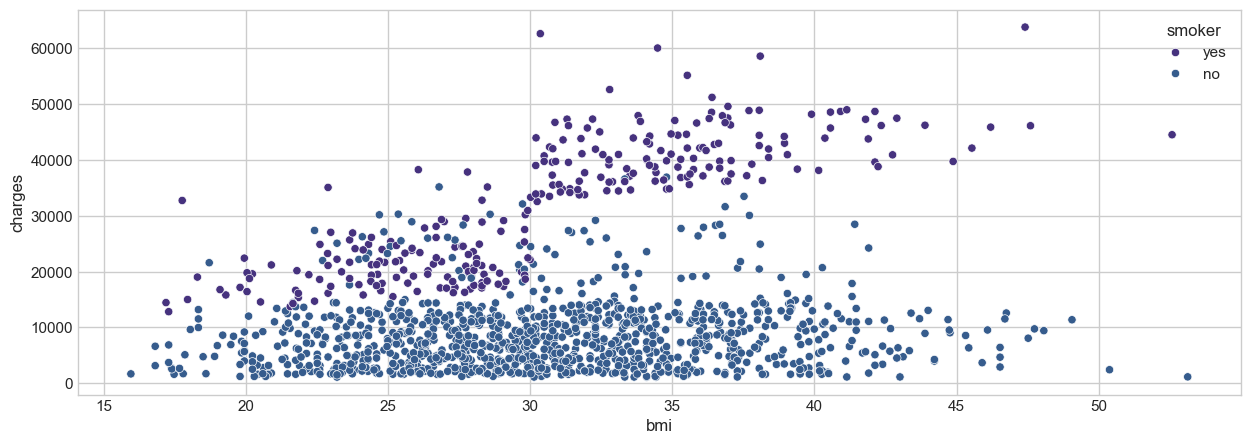

In [55]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)

<Axes: xlabel='age', ylabel='charges'>

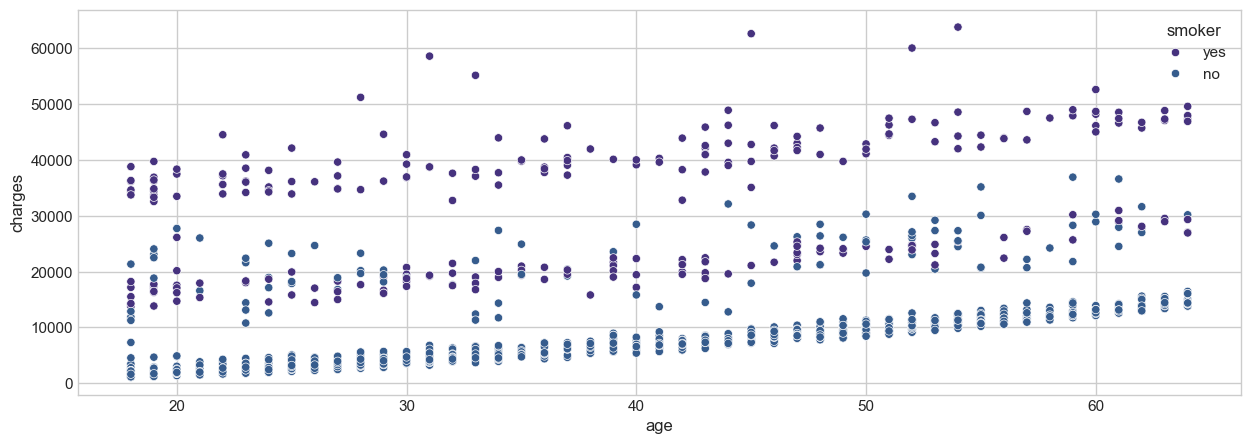

In [56]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)

# Barplot

In [57]:
region_charges = df.groupby(['region']).agg({'charges' : sum}).reset_index()
region_charges.sort_values(['charges'], ascending=False)

,region,charges
2,southeast,5.363690e+06
0,northeast,4.343669e+06
1,northwest,4.035712e+06
3,southwest,4.012755e+06


<Axes: xlabel='region', ylabel='charges'>

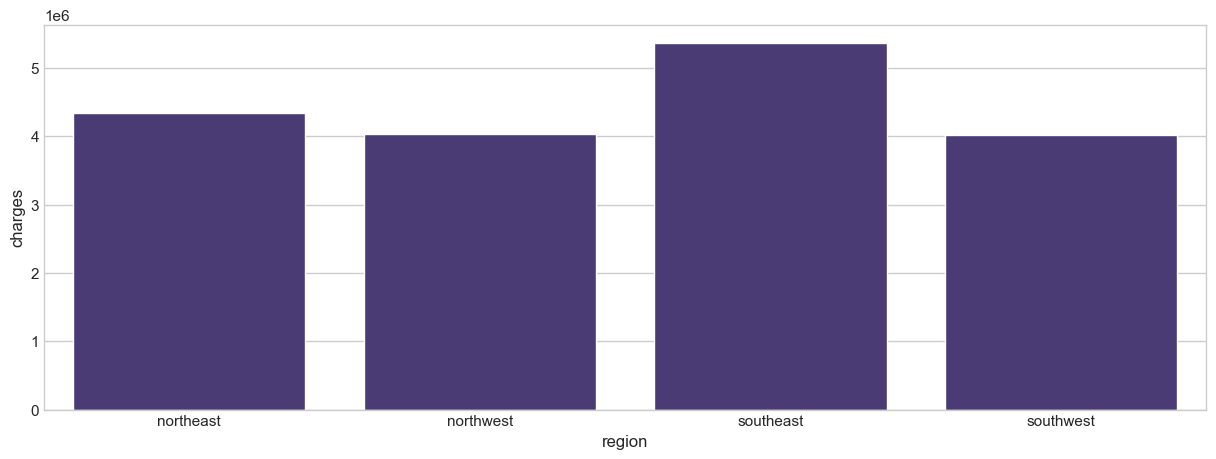

In [58]:
# Barplot Charges per Region
sns.barplot(x='region', y='charges', data=region_charges)

<Axes: xlabel='region', ylabel='charges'>

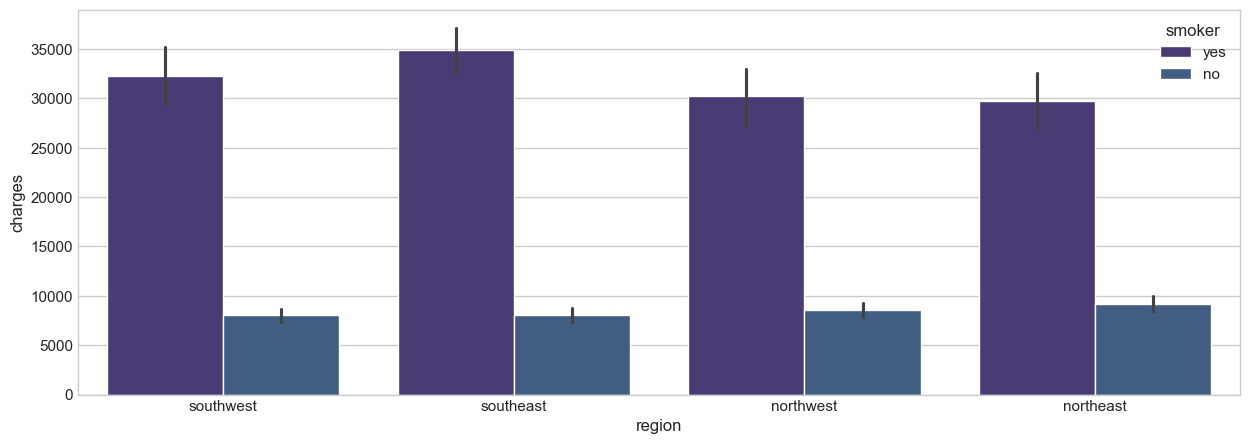

In [59]:
# Barplot with Hue Smoker
sns.barplot(x=df['region'], y=df['charges'], hue=df['smoker'], data=df)

<Axes: xlabel='region', ylabel='charges'>

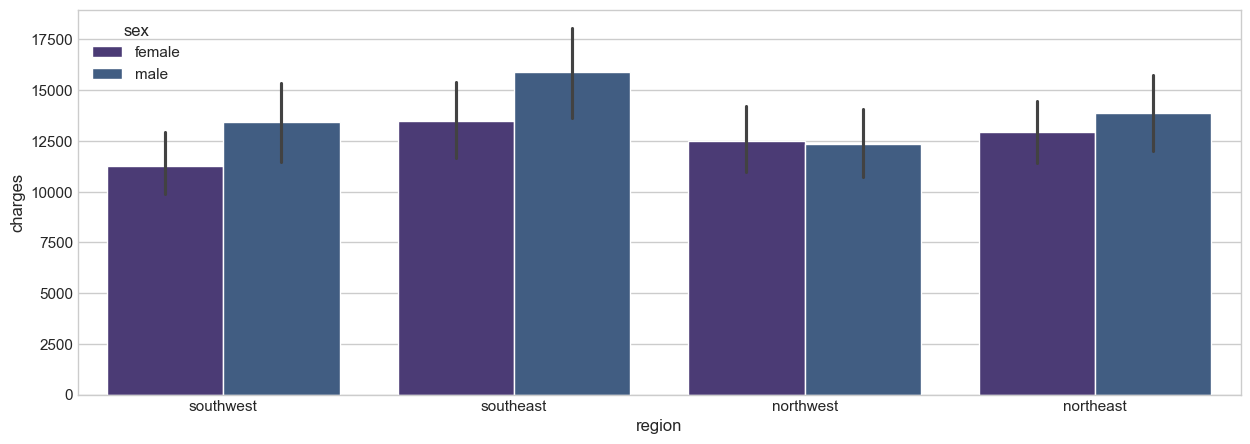

In [60]:
# Barplot with Hue Sex
sns.barplot(x=df['region'], y=df['charges'], hue='sex', data=df)

In [69]:
# #Count Smoker with Sex Hue
smoker_sex = df.groupby(['smoker', 'sex']).agg({'charges' : 'count'}).reset_index()
smoker_sex.columns = ['smoker', 'sex', 'count']
smoker_sex.sort_values(['smoker', 'count'], ascending = False)

,smoker,sex,count
3,yes,male,159
2,yes,female,115
0,no,female,547
1,no,male,517


<Axes: xlabel='sex', ylabel='count'>

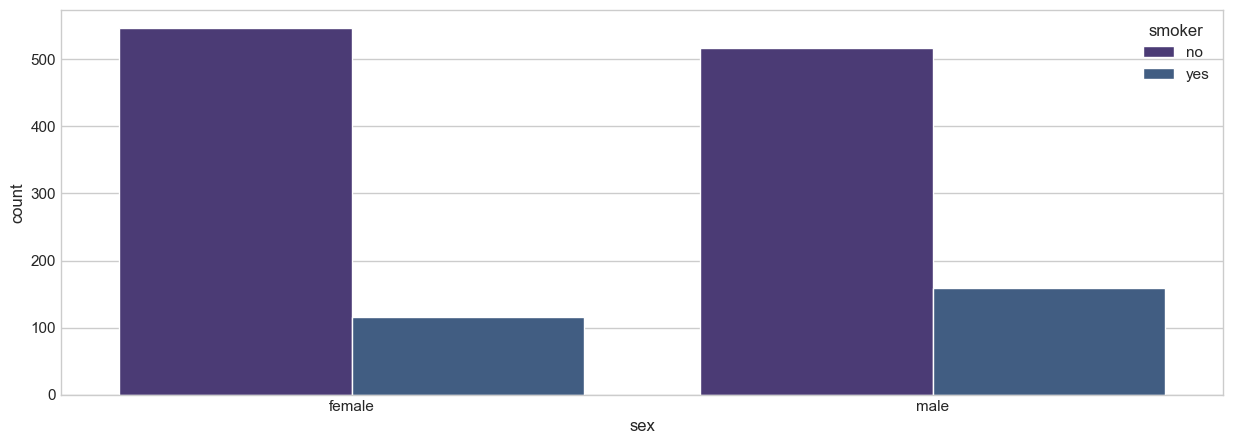

In [72]:
# Barplot Visualization
sns.barplot(x=smoker_sex['sex'], y=smoker_sex['count'], hue=smoker_sex['smoker'], data=smoker_sex)

<Axes: xlabel='children', ylabel='charges'>

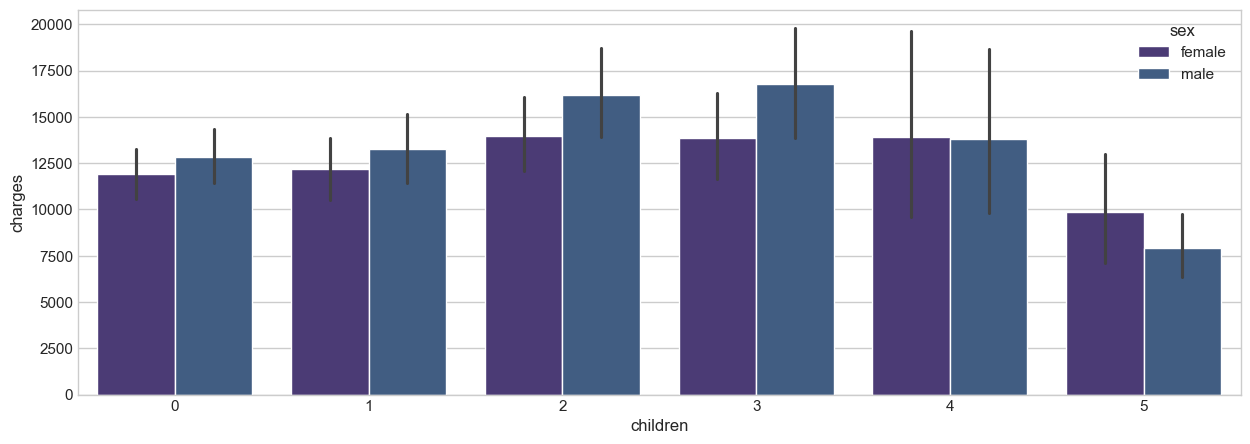

In [73]:
# Barplot with Hue Sex
sns.barplot(x=df['children'], y=df['charges'], hue=df['sex'], data = df)

<Axes: xlabel='children', ylabel='charges'>

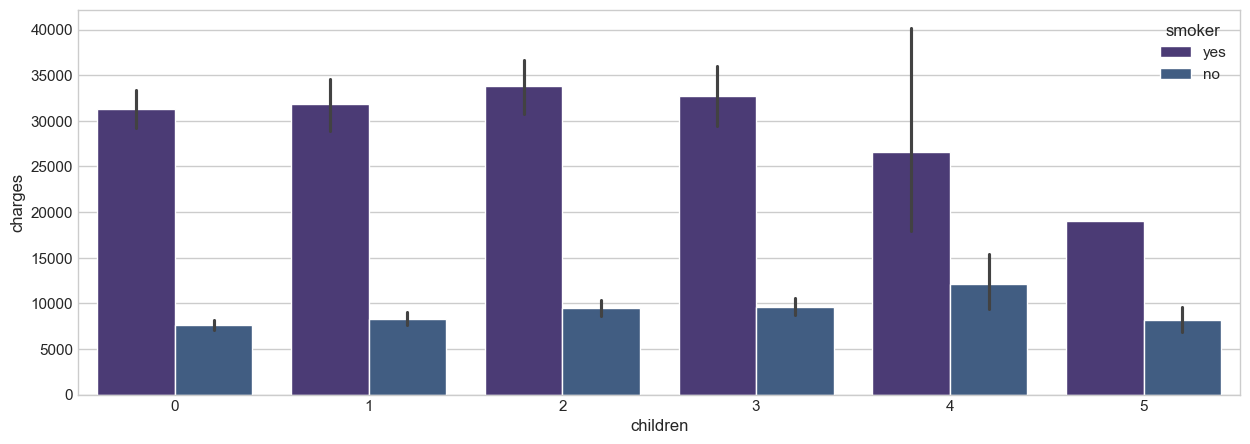

In [74]:
# Barplot with Hue Smoker
sns.barplot(x=df['children'], y=df['charges'], hue=df['smoker'], data = df)

In [75]:
# Count Weight_Status with Hue Smoker
smoker_status = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'count')
smoker_status

,weight_status,smoker,count
0,normal,no,179
1,normal,yes,51
2,obese,no,562
3,obese,yes,145
4,overweight,no,312
5,overweight,yes,74
6,underweigth,no,11
7,underweigth,yes,4


<Axes: xlabel='weight_status', ylabel='count'>

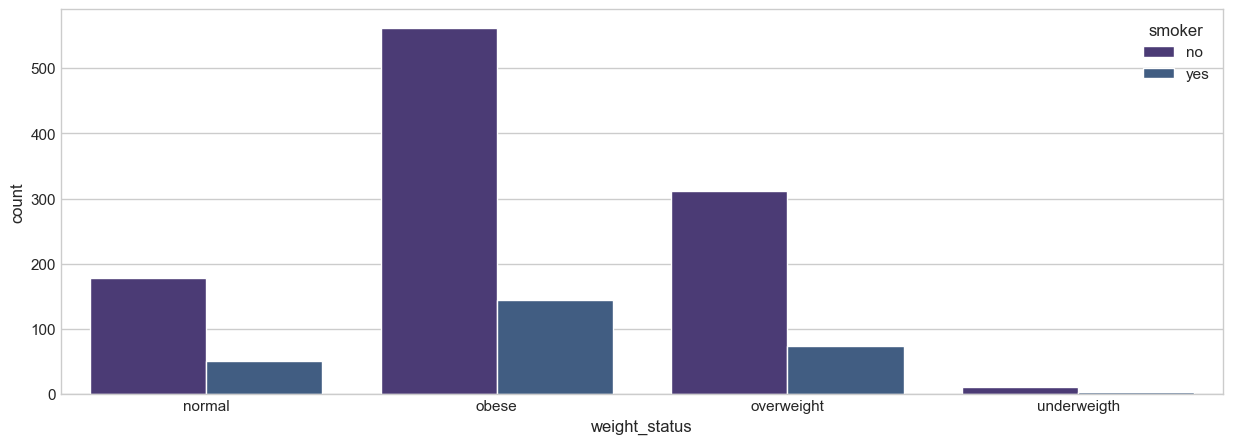

In [76]:
# Barplot smoker_status
sns.barplot(x='weight_status', y='count', hue='smoker', data=smoker_status)

In [77]:
# Count Weight_Status with Hue Smoker
smoker_status = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'sum'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'charges')
smoker_status

,weight_status,smoker,charges
0,normal,no,1.389364e+06
1,normal,yes,1.016134e+06
2,obese,no,4.969593e+06
3,obese,yes,6.025909e+06
4,overweight,no,2.576484e+06
5,overweight,yes,1.664695e+06
6,underweigth,no,3.862044e+04
7,underweigth,yes,7.502586e+04


In [78]:
# Insurance Cost based on Weight_Status and smoker
smoker_status_charges = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status_charges.columns = ['weight_status', 'smoker', 'count']
smoker_status_charges['total'] = smoker_status_charges.groupby(['weight_status'])['count'].transform('sum')
smoker_status_charges

,weight_status,smoker,count,total
0,normal,no,179,230
1,normal,yes,51,230
2,obese,no,562,707
3,obese,yes,145,707
4,overweight,no,312,386
5,overweight,yes,74,386
6,underweigth,no,11,15
7,underweigth,yes,4,15


<Axes: xlabel='weight_status', ylabel='count'>

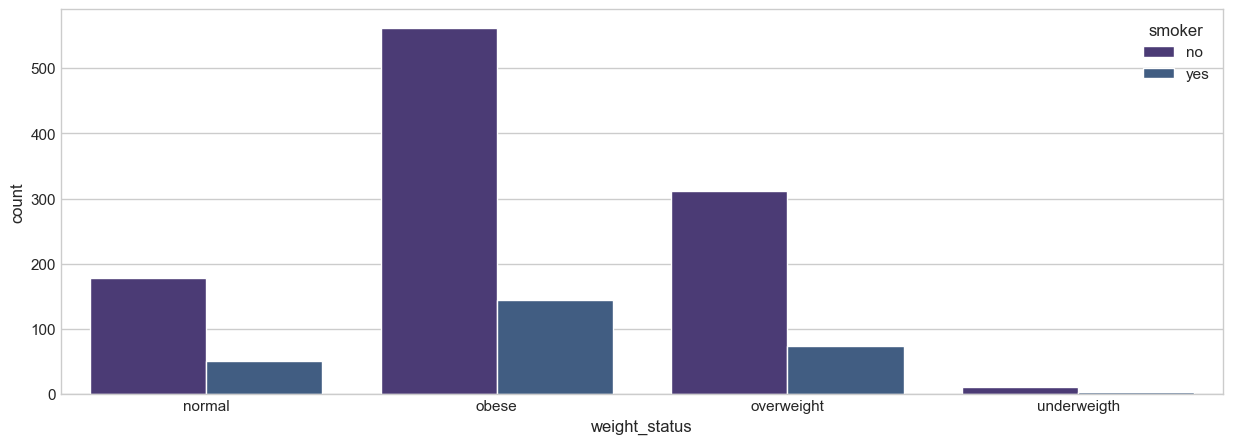

In [79]:
# Barplot Smoker_Status_Charges
sns.barplot(x='weight_status', y='count', hue='smoker', data=smoker_status_charges)

In [80]:
# Merge Columns
condition_cost = smoker_status.merge(smoker_status_charges,
                 left_on = ['weight_status', 'smoker'],
                 right_on = ['weight_status', 'smoker'],
                 how = 'inner')
condition_cost

,weight_status,smoker,charges,count,total
0,normal,no,1.389364e+06,179,230
1,normal,yes,1.016134e+06,51,230
2,obese,no,4.969593e+06,562,707
3,obese,yes,6.025909e+06,145,707
4,overweight,no,2.576484e+06,312,386
5,overweight,yes,1.664695e+06,74,386
6,underweigth,no,3.862044e+04,11,15
7,underweigth,yes,7.502586e+04,4,15


In [81]:
# Average Charges
condition_cost['avg_charges'] = condition_cost['charges'] / condition_cost['count']
condition_cost

,weight_status,smoker,charges,count,total,avg_charges
0,normal,no,1.389364e+06,179,230,7761.811458
1,normal,yes,1.016134e+06,51,230,19924.204746
2,obese,no,4.969593e+06,562,707,8842.691548
3,obese,yes,6.025909e+06,145,707,41557.989840
4,overweight,no,2.576484e+06,312,386,8257.961955
5,overweight,yes,1.664695e+06,74,386,22495.874163
6,underweigth,no,3.862044e+04,11,15,3510.948941
7,underweigth,yes,7.502586e+04,4,15,18756.466225


<Axes: xlabel='weight_status', ylabel='avg_charges'>

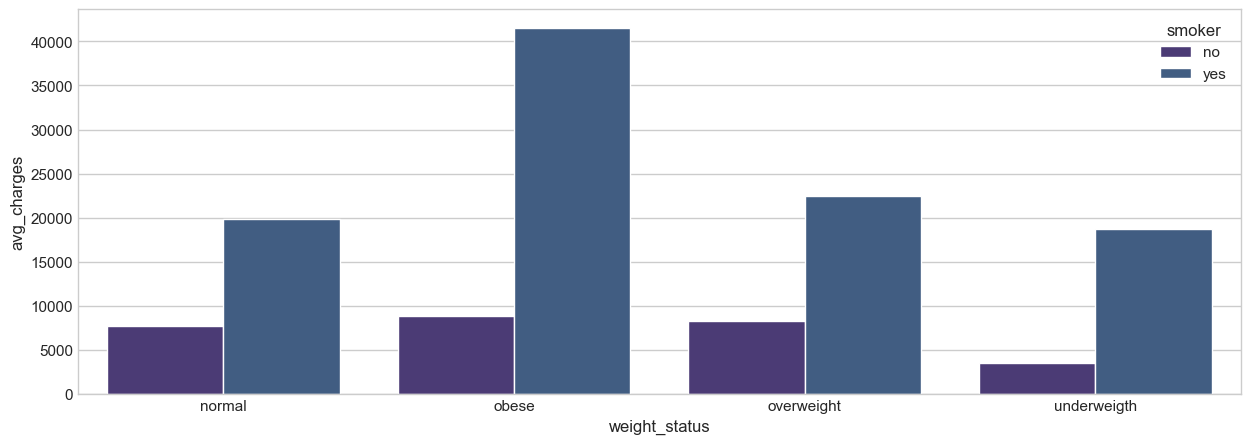

In [82]:
# Average Charges Barplot
sns.barplot(x='weight_status', y='avg_charges', hue='smoker', data=condition_cost)

Person who smoke have to pay more cost for insurance, obese person who smoke have the highest medical cost.

# Preprocessing the data (Data cleaning, Feature Transformation, Feature Scaling (Normalization))

## Missing Value

In [83]:
df.isna().sum()

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
charges          0
weight_status    0
dtype: int64

There are no missing value

# Duplicate Value

In [84]:
df.duplicated().sum()

1

In [85]:
# Remove Duplicate Value
df = df.drop_duplicates()

# Check Duplicate Value
df.duplicated().sum()

0

In [86]:
# Creating a Copy DataFrame
dfori = df.copy()

# Feature Transformation

* Ordinal Encoding
* One hot Encoding
* Feature Encoding

In [87]:
# Ordinal Encoding
dfori['smoker'] = dfori['smoker'].replace({'yes' : 0, 'no' : 1})

# One Hot Encoding
sex_ori = pd.get_dummies(dfori['sex'], prefix = 'sex')
region_ori = pd.get_dummies(dfori['region'], prefix = 'reg')
status_ori = pd.get_dummies(dfori['weight_status'], prefix = 'status')

# Concat Feature Encoding
dfori = pd.concat([dfori, sex_ori], axis=1)
dfori = pd.concat([dfori, region_ori], axis=1)
dfori = pd.concat([dfori, status_ori], axis=1)

In [88]:
# Drop Encoded Feature
dfori = dfori.drop(columns = ['sex', 'region', 'weight_status'])

# Check df
dfori.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,status_normal,status_obese,status_overweight,status_underweigth
0,19,27.900,0,0,16884.92400,True,False,False,False,False,True,False,False,True,False
1,18,33.770,1,1,1725.55230,False,True,False,False,True,False,False,True,False,False
2,28,33.000,3,1,4449.46200,False,True,False,False,True,False,False,True,False,False
3,33,22.705,0,1,21984.47061,False,True,False,True,False,False,True,False,False,False
4,32,28.880,0,1,3866.85520,False,True,False,True,False,False,False,False,True,False


In [89]:
dfori.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1337 non-null   int64  
 1   bmi                 1337 non-null   float64
 2   children            1337 non-null   int64  
 3   smoker              1337 non-null   int64  
 4   charges             1337 non-null   float64
 5   sex_female          1337 non-null   bool   
 6   sex_male            1337 non-null   bool   
 7   reg_northeast       1337 non-null   bool   
 8   reg_northwest       1337 non-null   bool   
 9   reg_southeast       1337 non-null   bool   
 10  reg_southwest       1337 non-null   bool   
 11  status_normal       1337 non-null   bool   
 12  status_obese        1337 non-null   bool   
 13  status_overweight   1337 non-null   bool   
 14  status_underweigth  1337 non-null   bool   
dtypes: bool(10), float64(2), int64(3)
memory usage: 75.7 KB


# Normalization (Feature Scaling)

In [90]:
# Grouping Features for Normalization
norm_ori = dfori.drop(columns=['charges']).columns
print(norm_ori)

Index(['age', 'bmi', 'children', 'smoker', 'sex_female', 'sex_male',
       'reg_northeast', 'reg_northwest', 'reg_southeast', 'reg_southwest',
       'status_normal', 'status_obese', 'status_overweight',
       'status_underweigth'],
      dtype='object')


In [94]:
# Import Library
from sklearn.preprocessing import MinMaxScaler

# Normalization Features
for i in range(len(norm_ori)):
    dfori[norm_ori[i]] = MinMaxScaler().fit_transform(dfori[norm_ori[i]].values.reshape(len(dfori), 1))

In [95]:
dfori.sample(10)

,age,bmi,children,smoker,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,status_normal,status_obese,status_overweight,status_underweigth
1255,0.521739,0.590261,0.0,1.0,6474.01300,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
336,0.913043,0.263115,0.0,1.0,12142.57860,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
706,0.717391,0.594566,0.0,0.0,44400.40640,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1277,0.304348,0.370595,0.0,1.0,4357.04365,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
792,0.086957,0.194243,0.0,1.0,2731.91220,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1219,0.434783,0.383374,0.6,1.0,7537.16390,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
123,0.565217,0.414044,0.2,0.0,39556.49450,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
169,0.195652,0.079231,0.6,1.0,4827.90495,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1178,0.108696,0.508609,0.0,1.0,2899.48935,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
992,0.695652,0.420769,0.4,1.0,10118.42400,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Conclusion

The insights drawn by performing Exploratory Data Analysis (EDA) are:

* Most people are a non smokers & obese
* Feature sex, region has an almost balanced amount
* People who smoke & have a higher BMI, has higher medical charges
* Older people who smoke have more expensive charges
* An obese person who smokes have higher charges